In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [121]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
data.shape

(1460, 81)

In [123]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [124]:
df = data.select_dtypes(['float64','int64'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [125]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [126]:
df.drop(['Id'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [127]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [128]:
miss_val = df.isnull().sum()

In [129]:
miss_val[miss_val>0].sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [130]:
columns = ['LotFrontage','GarageYrBlt','MasVnrArea']

for col in columns:
  df[col] = df[col].fillna(df[col].mean()) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [132]:
data_corr = df.corr()

In [133]:
data_corr = data_corr['SalePrice'][:-1]
df_corr = data_corr[abs(data_corr)>=0.60].sort_values(ascending = True)

In [134]:
df_corr

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64

In [135]:
df_main = df[['1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual','SalePrice']]

In [136]:
df_main.head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,856,856,548,2,1710,7,208500
1,1262,1262,460,2,1262,6,181500
2,920,920,608,2,1786,7,223500
3,961,756,642,3,1717,7,140000
4,1145,1145,836,3,2198,8,250000


#Checking Outliers from main data

In [137]:
df_main.columns

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual', 'SalePrice'],
      dtype='object')

In [138]:
features = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea','OverallQual']
list(enumerate(features))

[(0, '1stFlrSF'),
 (1, 'TotalBsmtSF'),
 (2, 'GarageArea'),
 (3, 'GarageCars'),
 (4, 'GrLivArea'),
 (5, 'OverallQual')]

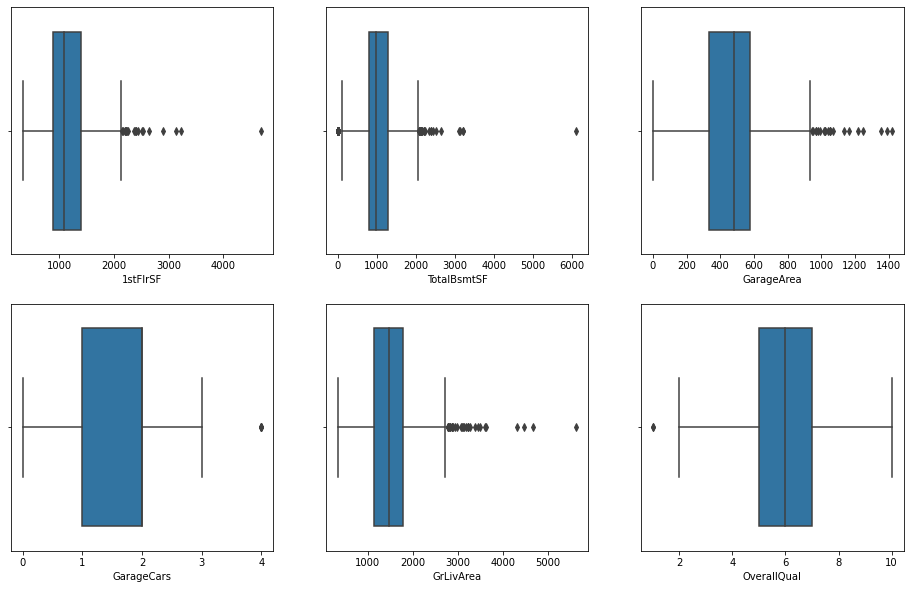

In [139]:
plt.figure(figsize=(16,10))

for i in enumerate(features):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(x = i[1],hue= 'SalePrice',data = df_main)

#Removing Outliers

In [140]:
Q1 , Q2 , Q3 = np.percentile(df['1stFlrSF'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['1stFlrSF']>low_lim]
df_main  = df_main[df_main['1stFlrSF']<up_lim]

In [141]:
Q1 , Q2 , Q3 = np.percentile(df['TotalBsmtSF'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['TotalBsmtSF']>low_lim]
df_main  = df_main[df_main['TotalBsmtSF']<up_lim]

In [142]:
Q1 , Q2 , Q3 = np.percentile(df['GarageArea'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['GarageArea']>low_lim]
df_main  = df_main[df_main['GarageArea']<up_lim]

In [143]:
Q1 , Q2 , Q3 = np.percentile(df['GarageCars'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['GarageCars']>low_lim]
df_main  = df_main[df_main['GarageCars']<up_lim]

In [144]:
Q1 , Q2 , Q3 = np.percentile(df['GrLivArea'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['GrLivArea']>low_lim]
df_main  = df_main[df_main['GrLivArea']<up_lim]

In [145]:
Q1 , Q2 , Q3 = np.percentile(df['OverallQual'],[25 , 50, 75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
df_main  = df_main[df_main['OverallQual']>low_lim]
df_main  = df_main[df_main['OverallQual']<up_lim]

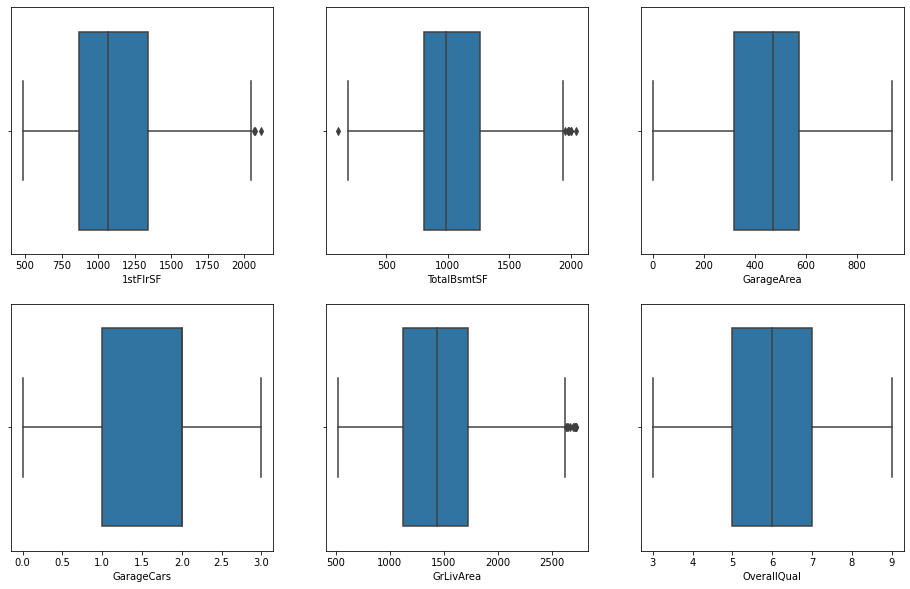

In [146]:
plt.figure(figsize=(16,10))

for i in enumerate(features):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(x = i[1],hue= 'SalePrice',data = df_main)

#Checking Corr

In [147]:
df_main.head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,856,856,548,2,1710,7,208500
1,1262,1262,460,2,1262,6,181500
2,920,920,608,2,1786,7,223500
3,961,756,642,3,1717,7,140000
4,1145,1145,836,3,2198,8,250000


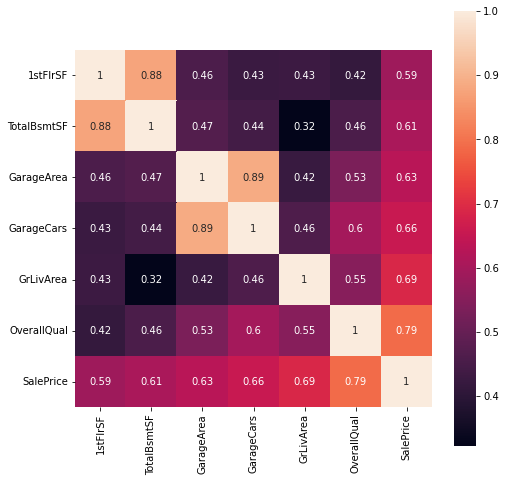

In [148]:
plt.figure(figsize= (8,8))
sns.heatmap(df_main.corr(),annot = True, square = True)

#Scaling Dataset


In [149]:
data_feat = df_main.columns

In [150]:
data_feat

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual', 'SalePrice'],
      dtype='object')

In [151]:
scale = MinMaxScaler()
scale.fit(df_main)


MinMaxScaler()

In [152]:
#Transforming

trans = scale.transform(df_main)
dataset = pd.DataFrame(trans)


In [153]:
dataset.columns = data_feat

In [154]:
dataset.describe()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,0.392712,0.485177,0.490681,0.576570,0.427149,0.510176,0.339584
std,0.200468,0.173963,0.208435,0.236734,0.196802,0.208439,0.156940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234394,0.359351,0.341346,0.333333,0.274208,0.333333,0.231184
50%,0.357405,0.452344,0.504274,0.666667,0.416290,0.500000,0.304112
75%,0.526316,0.594539,0.614316,0.666667,0.545475,0.666667,0.417030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#PCA

In [155]:
x = dataset.drop(['SalePrice'],axis = 1)
y = dataset['SalePrice']

In [156]:
pca = PCA()
pca.fit(x)

PCA()

In [157]:
var = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.61331031, 0.77359805, 0.89307475, 0.96451562, 0.98534691,
       1.        ])

Text(0, 0.5, 'cumulative explained variance')

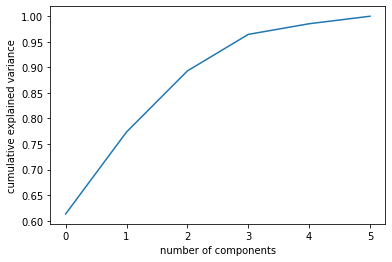

In [158]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [177]:
pca = PCA(n_components=3)
pca.fit(x)
new_data = pca.transform(x)

In [178]:
new_data

array([[-0.10085232, -0.23766765,  0.14319078],
       [-0.07941314,  0.07166515, -0.13220523],
       [-0.16624563, -0.21477653,  0.13230313],
       ...,
       [ 0.00420302,  0.2302116 ,  0.48229656],
       [ 0.3716852 ,  0.18105929, -0.05933628],
       [ 0.25876035,  0.28973414, -0.05228497]])

#Linear Reg

In [179]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size = 0.20)


In [180]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pred = lr.predict(x_test)

In [181]:
print('Mean Absolute Error of linear regression:',mean_absolute_error(pred,y_test))
print('Mean Square error of linear regression:',mean_squared_error(pred,y_test))
print('R_Squared Score of linear regression:', r2_score(pred,y_test))

Mean Absolute Error of linear regression: 0.04986196064484485
Mean Square error of linear regression: 0.00475677892539516
R_Squared Score of linear regression: 0.7740232851757621


In [182]:
model_score=lr.score(x_test,y_test)
print("Model Accuracy Score: ",model_score)

Model Accuracy Score:  0.8326306779022038
